# Section1

### Task 1

In [1]:
import statsmodels.api as sm
import pandas as pd

galton_data = sm.datasets.get_rdataset("Galton", "HistData").data
galton_data.head()

,parent,child
0,70.5,61.7
1,68.5,61.7
2,65.5,61.7
3,64.5,61.7
4,64.0,61.7


### a/.

In [2]:
# Reconstruct the contingency table

# Round heights to the nearest 0.5 ( to match table categories)

# galton_data['parent_rounded'] = galton_data['parent'].round(1)
# galton_data['child_rounded'] = galton_data['child'].round(1)

table = pd.crosstab(galton_data['child'], galton_data['parent'])
table

parent,64.0,64.5,65.5,66.5,67.5,68.5,69.5,70.5,71.5,72.5,73.0
child,,,,,,,,,,,
61.7,1,1,1,0,0,1,0,1,0,0,0
62.2,0,1,0,3,3,0,0,0,0,0,0
63.2,2,4,9,3,5,7,1,1,0,0,0
64.2,4,4,5,5,14,11,16,0,0,0,0
65.2,1,1,7,2,15,16,4,1,1,0,0
66.2,2,5,11,17,36,25,17,1,3,0,0
67.2,2,5,11,17,38,31,27,3,4,0,0
68.2,1,0,7,14,28,34,20,12,3,1,0
69.2,1,2,7,13,38,48,33,18,5,2,0


### b/.

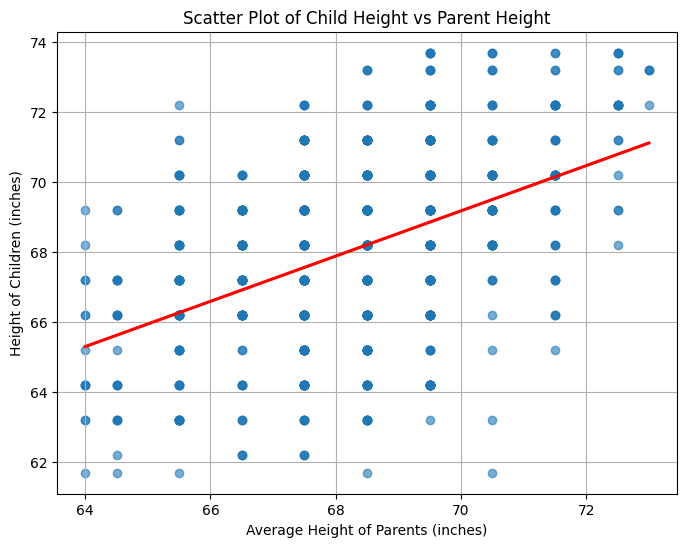

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(data=galton_data,  # regplot: scatter plot with regression line
x='parent', 
y='child', 
ci=None, # no confidence interval, Disables the confidence interval shading around the regression line (for a cleaner look).
line_kws={'color':'red'}, # regression line color
scatter_kws={'alpha':0.6} # transparency for scatter points
)
plt.title("Scatter Plot of Child Height vs Parent Height")
plt.xlabel("Average Height of Parents (inches)")
plt.ylabel("Height of Children (inches)")
plt.grid(True)
plt.show()

In [4]:
import statsmodels.formula.api as smf

# Fit linear regression model
model = smf.ols('child ~ parent', data=galton_data).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.73e-49
Time:                        00:05:49   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.0

## Task 2

### Install package in R then import it to python using rpy2(pip install rpy2)

In [5]:
import pandas as pd
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# Import the gamlss.data package
gamlss_data = importr('gamlss.data')

# Load the rent99 dataset
r('data(rent99)')

# Use context manager for conversion (modern approach)
with localconverter(pandas2ri.converter):
    rent99 = r['rent99']
    rent99 = pd.DataFrame(rent99)

# Display info about the dataframe (equivalent to glimpse)
print(rent99.info())
print("\n")
print(rent99.head())

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


<class 'pandas.core.frame.DataFrame'>
Index: 3082 entries, 1 to 3082
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      3082 non-null   float64
 1   rentsqm   3082 non-null   float64
 2   area      3082 non-null   int32  
 3   yearc     3082 non-null   float64
 4   location  3082 non-null   int32  
 5   bath      3082 non-null   int32  
 6   kitchen   3082 non-null   int32  
 7   cheating  3082 non-null   int32  
 8   district  3082 non-null   int32  
dtypes: float64(3), int32(6)
memory usage: 168.5+ KB
None


         rent   rentsqm  area   yearc  location  bath  kitchen  cheating  \
1  109.948715  4.228797    26  1918.0         2     1        1         1   
2  243.282043  8.688646    28  1918.0         2     1        1         2   
3  261.641022  8.721369    30  1918.0         1     1        1         2   
4  106.410255  3.547009    30  1918.0         2     1        1         1   
5  133.384613  4.446154    30 

In [6]:
rent99.columns

Index(['rent', 'rentsqm', 'area', 'yearc', 'location', 'bath', 'kitchen',
       'cheating', 'district'],
      dtype='object')

In [7]:
rent99.describe()

,rent,rentsqm,area,yearc,location,bath,kitchen,cheating,district
count,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,459.437179,7.111259,67.374757,1956.306295,1.443219,1.061973,1.042505,1.895847,1169.715769
std,195.656638,2.436008,23.720446,22.308868,0.545425,0.241145,0.201771,0.305509,677.849333
min,40.512821,0.415800,20.000000,1918.000000,1.000000,1.000000,1.000000,1.000000,113.000000
25%,322.025635,5.260958,51.000000,1939.000000,1.000000,1.000000,1.000000,2.000000,561.000000
50%,426.974350,6.980241,65.000000,1959.000000,1.000000,1.000000,1.000000,2.000000,1025.000000
75%,559.358994,8.840824,81.000000,1972.000000,2.000000,1.000000,1.000000,2.000000,1714.000000
max,1843.384644,17.721611,160.000000,1997.000000,3.000000,2.000000,2.000000,2.000000,2529.000000


In [8]:
rent99['rent']

1        109.948715
2        243.282043
3        261.641022
4        106.410255
5        133.384613
           ...     
3078    1517.948730
3079     358.769226
3080     746.820557
3081     593.948669
3082    1232.205200
Name: rent, Length: 3082, dtype: float64

### a. Reconstruct the histograms and kernel density estimates below.

(1920.0, 2000.0)

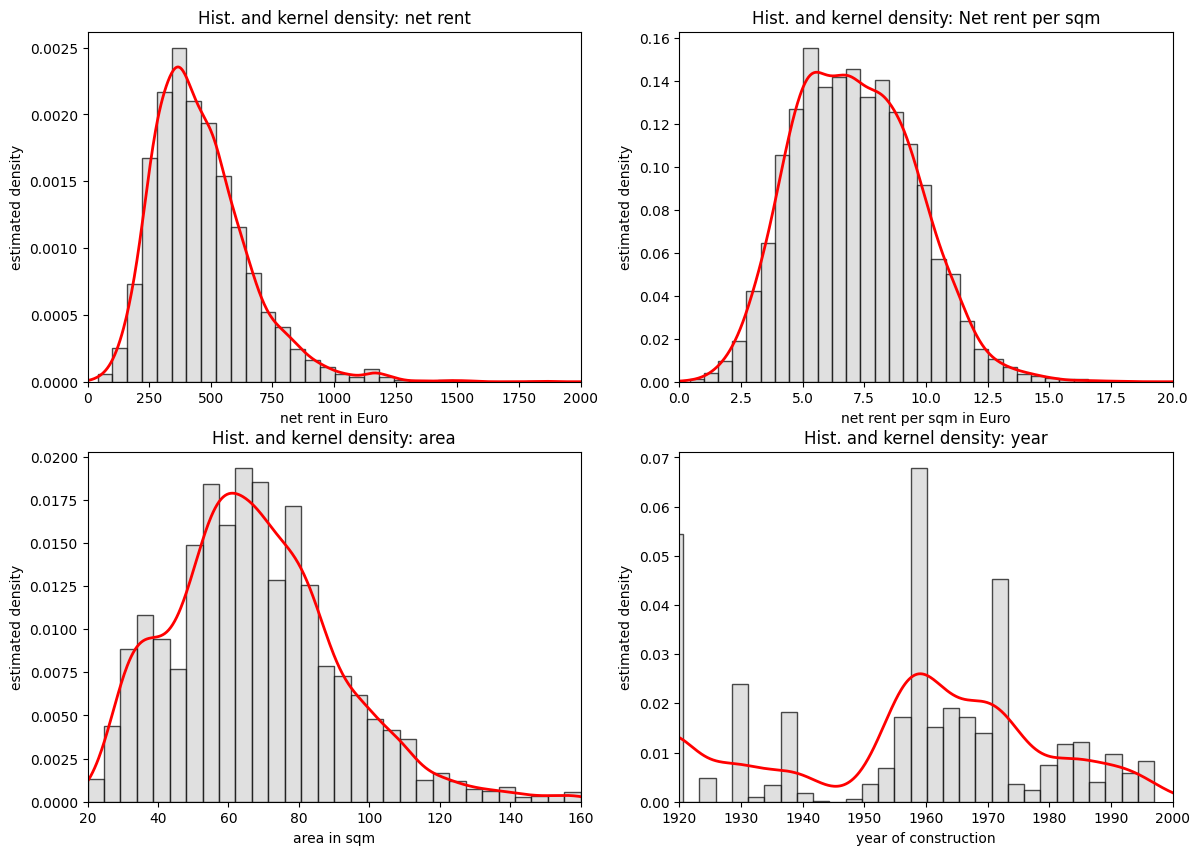

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
'''
axes → is a 2D array containing 4 axes (subplots):

axes[0,0] → top-left

axes[0,1] → top-right

axes[1,0] → bottom-left

axes[1,1] → bottom-right
'''
# 1.Histogram and KDE for rent
ax1 = axes[0, 0]
ax1.hist(rent99['rent'],
          bins=30, #divides the data into 30 intervals
          density=True, #normalizes the histogram so the area = 1 , it shows the probability not raw counts
          alpha=0.7, #transparency level
         edgecolor='black', #black borders
         color='lightgray')
rent99['rent'].plot(kind='kde', ax=ax1, color='red', linewidth=2)#adds a KDE curve (smooth probability density line) in red
ax1.set_xlabel('net rent in Euro')
ax1.set_ylabel('estimated density')
ax1.set_title('Hist. and kernel density: net rent')
ax1.set_xlim(0, 2000)

# 2. Histogram and KDE for net rent per sqm
ax2 = axes[0, 1]
ax2.hist(rent99['rentsqm'], bins=30, density=True, alpha=0.7, 
         edgecolor='black', color='lightgray')
rent99['rentsqm'].plot(kind='kde', ax=ax2, color='red', linewidth=2)
ax2.set_xlabel('net rent per sqm in Euro')
ax2.set_ylabel('estimated density')
ax2.set_title('Hist. and kernel density: Net rent per sqm')
ax2.set_xlim(0, 20)

# 3. Histogram and KDE for area
ax3 = axes[1, 0]
ax3.hist(rent99['area'], bins=30, density=True, alpha=0.7, 
         edgecolor='black', color='lightgray')
rent99['area'].plot(kind='kde', ax=ax3, color='red', linewidth=2)
ax3.set_xlabel('area in sqm')
ax3.set_ylabel('estimated density')
ax3.set_title('Hist. and kernel density: area')
ax3.set_xlim(20, 160)

# 4. Histogram and KDE for year of construction
ax4 = axes[1, 1]
ax4.hist(rent99['yearc'], bins=30, density=True, alpha=0.7, 
         edgecolor='black', color='lightgray')
rent99['yearc'].plot(kind='kde', ax=ax4, color='red', linewidth=2)
ax4.set_xlabel('year of construction')
ax4.set_ylabel('estimated density')
ax4.set_title('Hist. and kernel density: year')
ax4.set_xlim(1920, 2000)

### b. Reconstruct the scatter plots below.

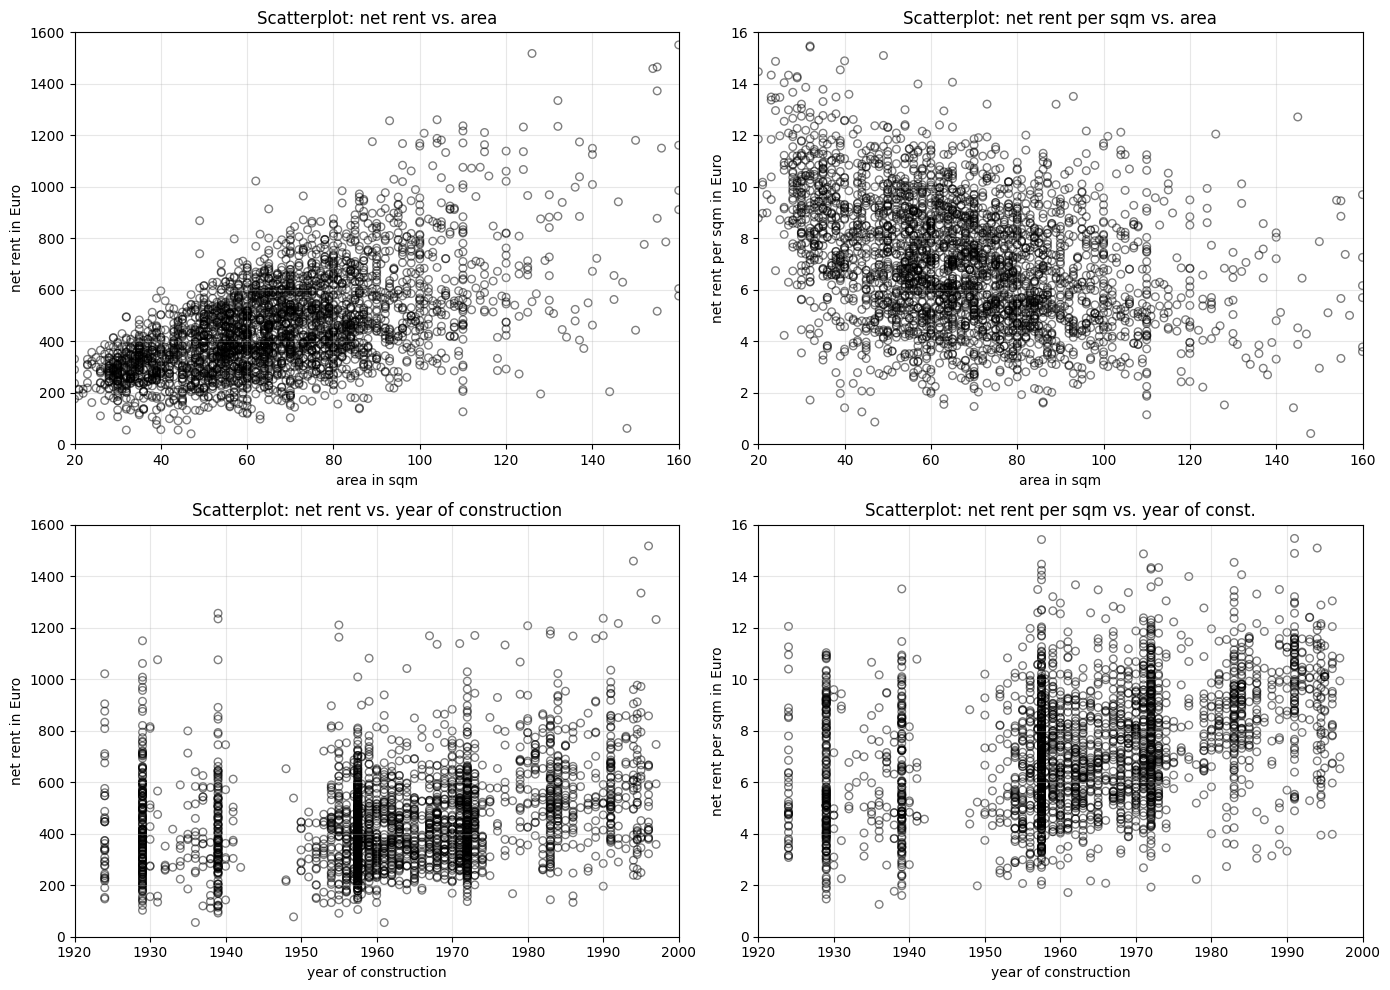

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Scatterplot: net rent vs. area
ax1 = axes[0, 0]
ax1.scatter(rent99['area'], rent99['rent'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30) #s: size of points
ax1.set_xlabel('area in sqm')
ax1.set_ylabel('net rent in Euro')
ax1.set_title('Scatterplot: net rent vs. area')
ax1.set_xlim(20, 160)
ax1.set_ylim(0, 1600)
ax1.grid(True, alpha=0.3)

# 2. Scatterplot: net rent per sqm vs. area
ax2 = axes[0, 1]
ax2.scatter(rent99['area'], rent99['rentsqm'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30)
ax2.set_xlabel('area in sqm')
ax2.set_ylabel('net rent per sqm in Euro')
ax2.set_title('Scatterplot: net rent per sqm vs. area')
ax2.set_xlim(20, 160)
ax2.set_ylim(0, 16)
ax2.grid(True, alpha=0.3)

# 3. Scatterplot: net rent vs. year of construction
ax3 = axes[1, 0]
ax3.scatter(rent99['yearc'], rent99['rent'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30)
ax3.set_xlabel('year of construction')
ax3.set_ylabel('net rent in Euro')
ax3.set_title('Scatterplot: net rent vs. year of construction')
ax3.set_xlim(1920, 2000)
ax3.set_ylim(0, 1600)
ax3.grid(True, alpha=0.3)

# 4. Scatterplot: net rent per sqm vs. year of construction
ax4 = axes[1, 1]
ax4.scatter(rent99['yearc'], rent99['rentsqm'], alpha=0.5, 
            edgecolors='black', facecolors='none', s=30)
ax4.set_xlabel('year of construction')
ax4.set_ylabel('net rent per sqm in Euro')
ax4.set_title('Scatterplot: net rent per sqm vs. year of const.')
ax4.set_xlim(1920, 2000)
ax4.set_ylim(0, 16)
ax4.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


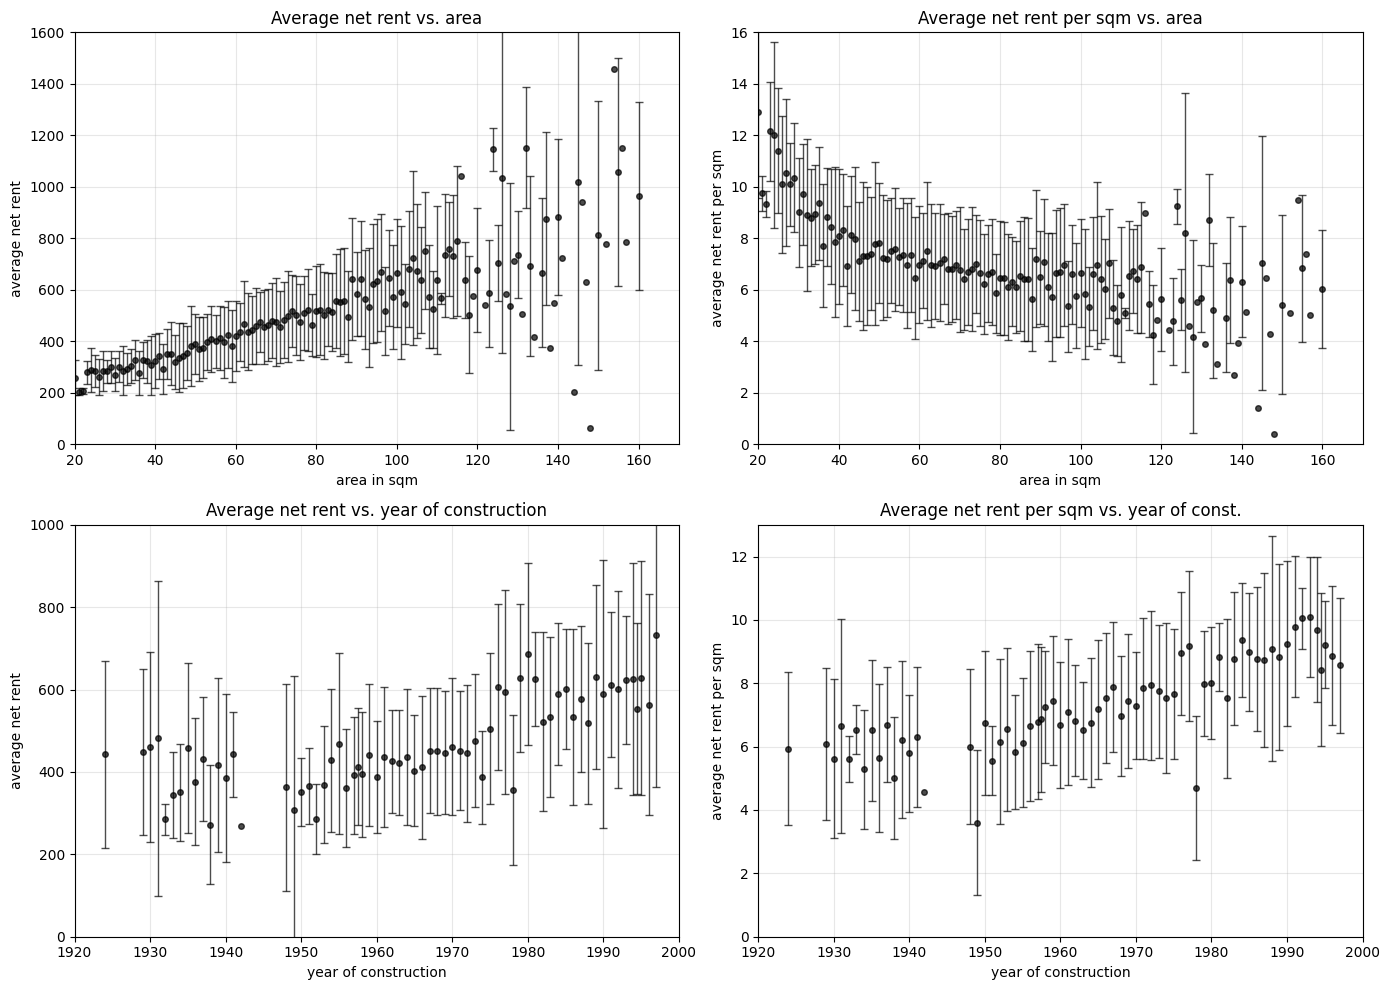

'\nResult: \nX-axis → Apartment size (sqm)\n\nY-axis → Average rent (euros)\n\nDots → Mean rent for each area\n\nVertical bars → Standard deviation (how much rents vary at that area size)\n'

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Average net rent vs. area
ax1 = axes[0, 0]
# Group by area and calculate mean and std
area_stats = rent99.groupby('area')['rent'].agg(['mean', 'std', 'count'])
area_stats = area_stats[area_stats['count'] >= 1]  # Filter groups with data
'''
This ensures we only include areas that have at least one data point 
(though here every area likely has ≥1, so it’s a safety check).
'''

ax1.errorbar(area_stats.index, area_stats['mean'], yerr=area_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax1.set_xlabel('area in sqm')
ax1.set_ylabel('average net rent')
ax1.set_title('Average net rent vs. area')
ax1.set_ylim(0, 1600)
ax1.set_xlim(20, 170)
ax1.grid(True, alpha=0.3)

# 2. Average net rent per sqm vs. area
ax2 = axes[0, 1]
area_rentsqm_stats = rent99.groupby('area')['rentsqm'].agg(['mean', 'std', 'count'])
area_rentsqm_stats = area_rentsqm_stats[area_rentsqm_stats['count'] >= 1]

ax2.errorbar(area_rentsqm_stats.index, area_rentsqm_stats['mean'], 
             yerr=area_rentsqm_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax2.set_xlabel('area in sqm')
ax2.set_ylabel('average net rent per sqm')
ax2.set_title('Average net rent per sqm vs. area')
ax2.set_ylim(0, 16)
ax2.set_xlim(20, 170)
ax2.grid(True, alpha=0.3)

# 3. Average net rent vs. year of construction
ax3 = axes[1, 0]
year_stats = rent99.groupby('yearc')['rent'].agg(['mean', 'std', 'count'])
year_stats = year_stats[year_stats['count'] >= 1]

ax3.errorbar(year_stats.index, year_stats['mean'], yerr=year_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax3.set_xlabel('year of construction')
ax3.set_ylabel('average net rent')
ax3.set_title('Average net rent vs. year of construction')
ax3.set_ylim(0, 1000)
ax3.set_xlim(1920, 2000)
ax3.grid(True, alpha=0.3)

# 4. Average net rent per sqm vs. year of construction
ax4 = axes[1, 1]
year_rentsqm_stats = rent99.groupby('yearc')['rentsqm'].agg(['mean', 'std', 'count'])
year_rentsqm_stats = year_rentsqm_stats[year_rentsqm_stats['count'] >= 1]

ax4.errorbar(year_rentsqm_stats.index, year_rentsqm_stats['mean'], 
             yerr=year_rentsqm_stats['std'], 
             fmt='o', color='black', markersize=4, capsize=3, 
             elinewidth=1, alpha=0.7)
ax4.set_xlabel('year of construction')
ax4.set_ylabel('average net rent per sqm')
ax4.set_title('Average net rent per sqm vs. year of const.')
ax4.set_ylim(0, 13)
ax4.set_xlim(1920, 2000)
ax4.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

'''
Result: 
X-axis → Apartment size (sqm)

Y-axis → Average rent (euros)

Dots → Mean rent for each area

Vertical bars → Standard deviation (how much rents vary at that area size)
'''

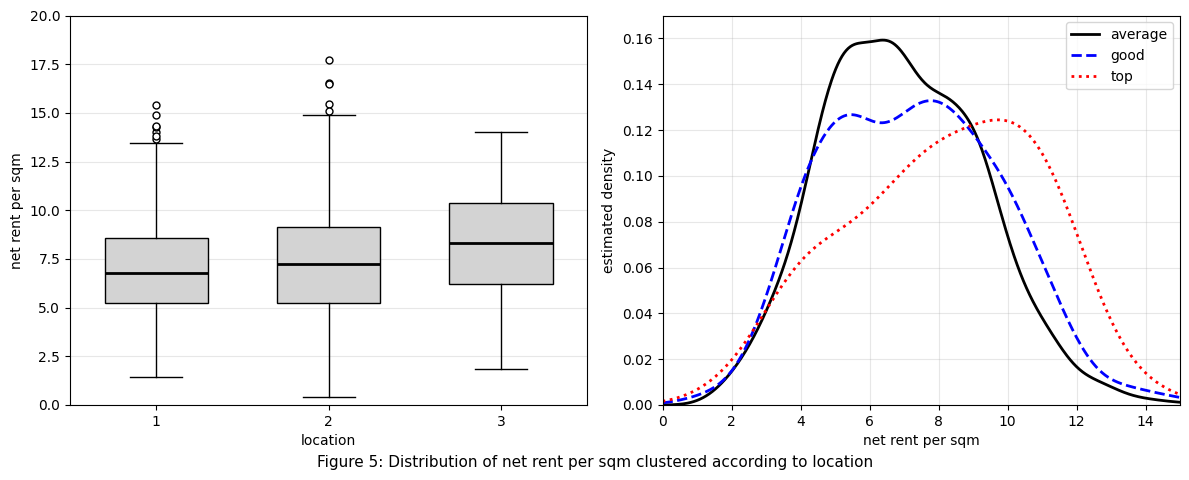

In [13]:
from scipy import stats

# Create figure with 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Box plot: net rent per sqm by location
ax1 = axes[0]

# Prepare data for boxplot - group by location
locations = sorted(rent99['location'].unique())
data_by_location = [rent99[rent99['location'] == loc]['rentsqm'].values 
                    for loc in locations]

# Create boxplot
bp = ax1.boxplot(data_by_location, positions=locations, widths=0.6,
                 patch_artist=True, showfliers=True,
                 boxprops=dict(facecolor='lightgray', color='black'),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'),
                 flierprops=dict(marker='o', markerfacecolor='white', 
                                markeredgecolor='black', markersize=5))

ax1.set_xlabel('location')
ax1.set_ylabel('net rent per sqm')
ax1.set_ylim(0, 20)
ax1.set_xticks(locations)
ax1.set_xticklabels(locations)
ax1.grid(True, alpha=0.3, axis='y')

# 2. Smooth density estimates by location
ax2 = axes[1]

# Define colors/styles for each location
location_labels = {1: 'average', 2: 'good', 3: 'top'}
line_styles = {1: '-', 2: '--', 3: ':'}
colors = {1: 'black', 2: 'blue', 3: 'red'}

# Create density plots for each location
x_range = np.linspace(0, 15, 500)

for loc in locations:
    data = rent99[rent99['location'] == loc]['rentsqm'].values
    
    # Calculate kernel density estimate
    kde = stats.gaussian_kde(data)
    density = kde(x_range)
    
    # Plot
    ax2.plot(x_range, density, 
             linestyle=line_styles[loc], 
             color=colors[loc],
             linewidth=2,
             label=location_labels[loc])

ax2.set_xlabel('net rent per sqm')
ax2.set_ylabel('estimated density')
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 0.17)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Main title
fig.suptitle('Figure 5: Distribution of net rent per sqm clustered according to location',
             y=0.02, fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()


## Task 3: Fuel Consumption


In [19]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
# Import the alr4 package
alr4 = importr('alr4')

# Load the fuel2001 dataset
robjects.r('data(fuel2001)')
# Convert to pandas DataFrame using the new converter context
with localconverter(robjects.default_converter + pandas2ri.converter):
    fuel2001_df = robjects.conversion.get_conversion().rpy2py(robjects.r['fuel2001'])

print(fuel2001_df.head())
print(f"\nShape: {fuel2001_df.shape}")
print(f"\nColumns: {fuel2001_df.columns.tolist()}")
print(f"\nData types:\n{fuel2001_df.dtypes}")

     Drivers     FuelC  Income   Miles       MPC       Pop   Tax
AL   3559897   2382507   23471   94440  12737.00   3451586  18.0
AK    472211    235400   30064   13628   7639.16    457728   8.0
AZ   3550367   2428430   25578   55245   9411.55   3907526  18.0
AR   1961883   1358174   22257   98132  11268.40   2072622  21.7
CA  21623793  14691753   32275  168771   8923.89  25599275  18.0

Shape: (51, 7)

Columns: ['Drivers', 'FuelC', 'Income', 'Miles', 'MPC', 'Pop', 'Tax']

Data types:
Drivers      int32
FuelC        int32
Income       int32
Miles        int32
MPC        float64
Pop          int32
Tax        float64
dtype: object


### a/. Create 3 more following variables and add to the fuel data consumption

In [22]:
# Fuel: 1000 * Drivers/Pop
fuel2001_df['Fuel'] = 1000 * fuel2001_df['FuelC'] / fuel2001_df['Pop']

#Dlic: 1000 × Drivers/Pop
fuel2001_df['Dlic'] = 1000 * fuel2001_df['Drivers'] / fuel2001_df['Pop']

#log(Miles): natural logarithm of Miles
fuel2001_df['log_Miles'] = np.log(fuel2001_df['Miles'])

print("\n" + "="*60)
print("NEW VARIABLES CREATED")
print("="*60)
print(f"Fuel: Fuel consumption per 1000 population")
print(f"Dlic: Drivers per 1000 population")
print(f"log_Miles: Natural log of Miles")
print("\nUpdated Dataset Shape:", fuel2001_df.shape)
print("\nNew variables summary:")
print(fuel2001_df[['Fuel', 'Dlic', 'log_Miles']].describe())


NEW VARIABLES CREATED
Fuel: Fuel consumption per 1000 population
Dlic: Drivers per 1000 population
log_Miles: Natural log of Miles

Updated Dataset Shape: (51, 10)

New variables summary:
             Fuel         Dlic  log_Miles
count   51.000000    51.000000  51.000000
mean   227.673734   303.274075  10.913714
std    452.982250   578.930057   1.030512
min   -667.011103  -796.174181   7.335634
25%    -91.760803  -138.669174  10.507358
50%    426.349370   113.173514  11.276114
75%    627.225941   916.434514  11.633615
max    842.791752  1075.288202  12.614091


### b. Based on the goal of the task

In [ ]:
# Define response variable
# Based on the context, 'Fuel' (fuel consumption per capita) is likely the response variable
response_var = 'Fuel'
predictor_vars = ['Dlic', 'log_Miles', 'Tax', 'Income']

In [ ]:
# Study the overview of each variable by using initial descriptive 
print("MISSING VALUES CHECK")
print("="*60)
print(fuel2001_df.isnull().sum())
print(fuel2001_df.describe())

MISSING VALUES CHECK
Drivers      0
FuelC        0
Income       0
Miles        0
MPC          0
Pop          0
Tax          0
Fuel         0
Dlic         0
log_Miles    0
dtype: int64
            Drivers         FuelC        Income          Miles           MPC  \
count  5.100000e+01  5.100000e+01     51.000000      51.000000     51.000000   
mean   3.750504e+06  2.542786e+06  28403.901961   77418.588235  10448.281765   
std    3.991156e+06  2.697368e+06   4451.637224   52983.429444   2039.597617   
min    3.280940e+05  1.487690e+05  20993.000000    1534.000000   6555.940000   
25%    1.087128e+06  7.373610e+05  25323.000000   36586.000000   9391.420000   
50%    2.718209e+06  2.048664e+06  27871.000000   78914.000000  10458.400000   
75%    4.424256e+06  3.039932e+06  31208.500000  112827.500000  11310.850000   
max    2.162379e+07  1.469175e+07  40640.000000  300767.000000  17494.900000   

                Pop        Tax        Fuel         Dlic  log_Miles  
count  5.100000e+01  51.00

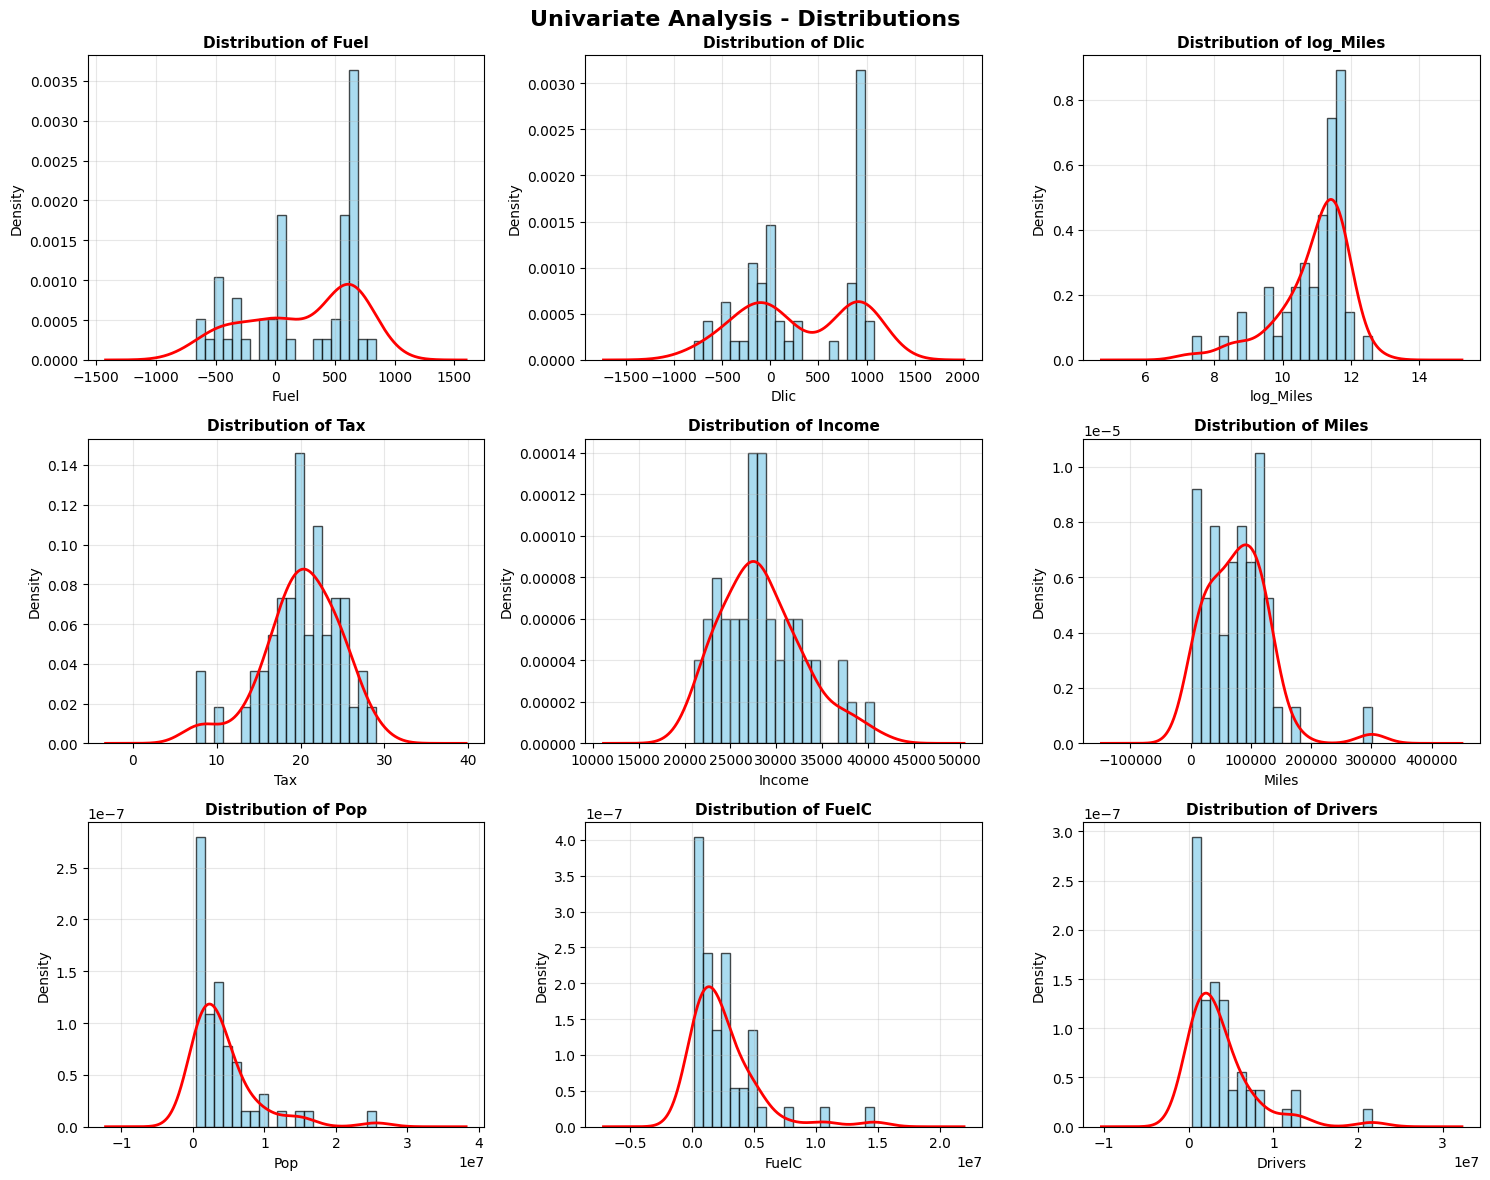

In [31]:
#  Univariate Analysis - Graphical

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Univariate Analysis - Distributions', fontsize=16, fontweight='bold')

variables = ['Fuel', 'Dlic', 'log_Miles', 'Tax', 'Income', 'Miles', 'Pop', 'FuelC', 'Drivers']

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Histogram with KDE
    ax.hist(fuel2001_df[var], bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    fuel2001_df[var].plot(kind='kde', ax=ax, color='red', linewidth=2)
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'Distribution of {var}', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('univariate_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



CORRELATION MATRIX
               Fuel      Dlic  log_Miles       Tax    Income
Fuel       1.000000  0.634476  -0.285580  0.162865 -0.171858
Dlic       0.634476  1.000000  -0.421150  0.105997 -0.238153
log_Miles -0.285580 -0.421150   1.000000 -0.043737 -0.295851
Tax        0.162865  0.105997  -0.043737  1.000000 -0.010685
Income    -0.171858 -0.238153  -0.295851 -0.010685  1.000000


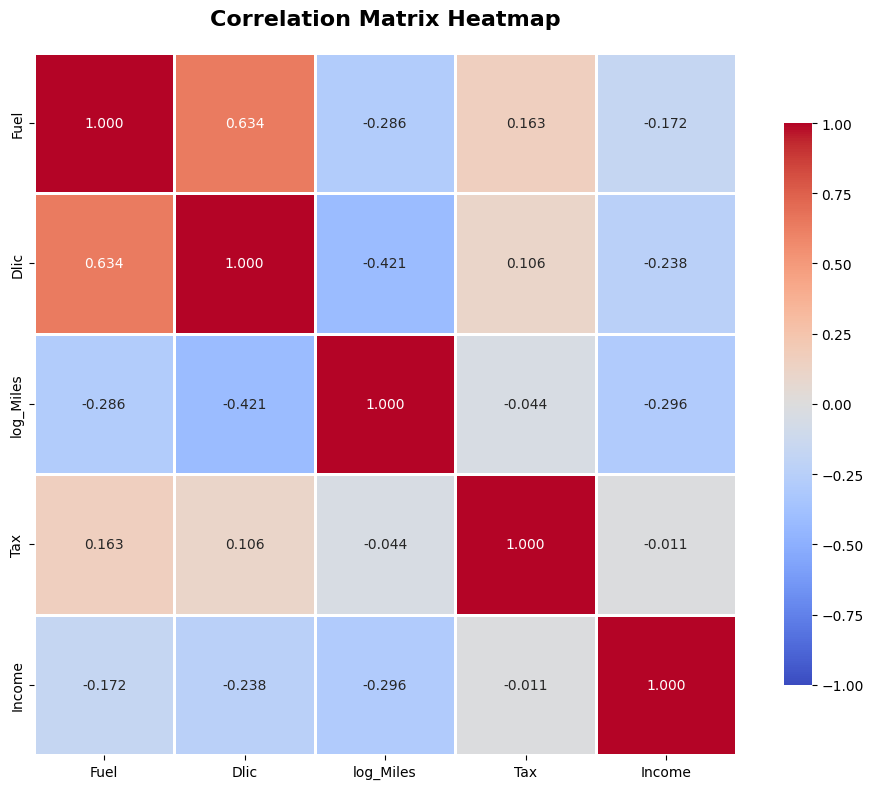

In [32]:
# Correlation Matrix and Heatmap
print("\n" + "="*60)
print("CORRELATION MATRIX")
print("="*60)

# Select relevant variables for correlation
corr_vars = ['Fuel', 'Dlic', 'log_Miles', 'Tax', 'Income']
correlation_matrix = fuel2001_df[corr_vars].corr()
print(correlation_matrix)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

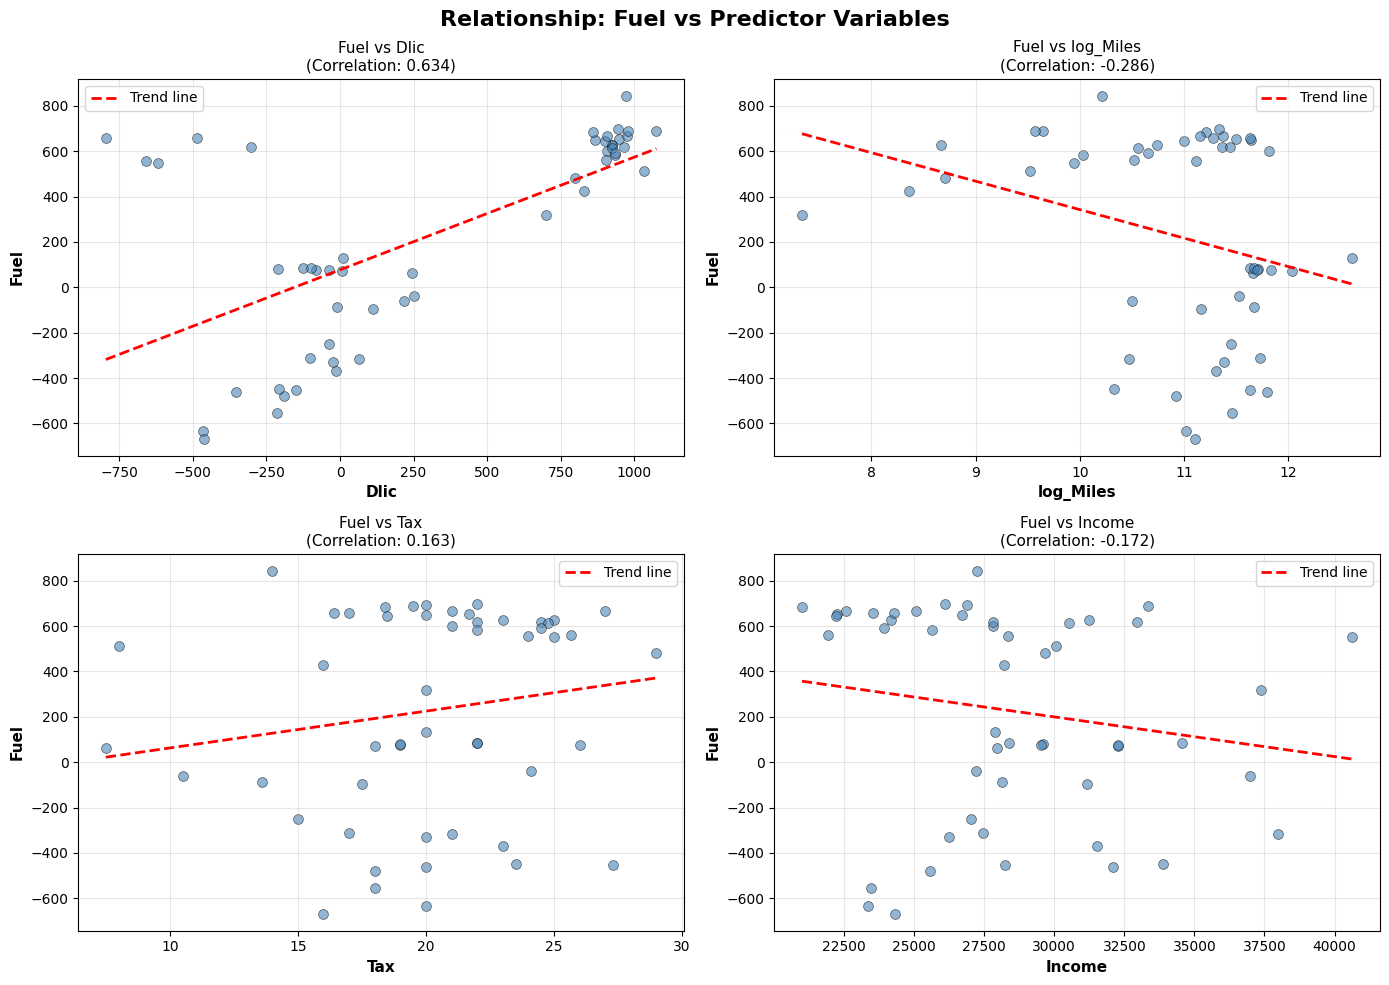

In [35]:
#  Response vs Predictors - Scatter plots

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Relationship: {response_var} vs Predictor Variables', 
             fontsize=16, fontweight='bold')

predictors = ['Dlic', 'log_Miles', 'Tax', 'Income']

for idx, pred in enumerate(predictors):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Scatter plot
    ax.scatter(fuel2001_df[pred], fuel2001_df[response_var], 
               alpha=0.6, s=50, color='steelblue', edgecolors='black', linewidth=0.5)
    
    # Add regression line
    z = np.polyfit(fuel2001_df[pred].dropna(), 
                   fuel2001_df[response_var].dropna(), 1)
    p = np.poly1d(z)
    x_line = np.linspace(fuel2001_df[pred].min(), fuel2001_df[pred].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend line')
    
    # Calculate correlation
    corr = fuel2001_df[[pred, response_var]].corr().iloc[0, 1]

    ax.set_xlabel(pred, fontsize=11, fontweight='bold')
    ax.set_ylabel(response_var, fontsize=11, fontweight='bold')
    ax.set_title(f'{response_var} vs {pred}\n(Correlation: {corr:.3f})', 
                 fontsize=11)
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig('response_vs_predictors.png', dpi=300, bbox_inches='tight')
plt.show()
